#### Wesleyan University ASTR 221

## Tutorial 1: One-dimensional gridding

In general, when modeling something numerically we have to move away from the land of the *continuous* to the land of the *discrete*.  Today we'll talk about strategies for representing continuous functions on discrete grids.  We'll stick to 1D today and talk about 2/3D next time.  In this example, we'll use a numerical representation of an NFW profile to approximate the total mass of the Milky Way's dark matter halo (without having to integrate the function).

Import statements at the top, as always:

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120  # Determines resolution (and therefore size) of figures
from math import pi

Let's consider the Navarro-Frenk-White (NFW) density profile which describes dark matter halos,

$$\rho(r) = \frac{\rho_s}{(r/r_s)(1+r/r_s)^2}$$

To put this into concrete numbers, the Milky Way's DM profile has something like $\rho_s = 7 \times 10^{-3}~{\rm M}_\odot/{\rm pc}^3$ and $r_s = 20~{\rm kpc}$.

We'll use numpy's linspace function to define a grid of equally-spaced radius values at which to sample the function,

In [3]:
# Construct array of 101 equally-spaced radii from 0 to 200 kpc
r = np.linspace(0,200,101)
r

array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
        22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
        44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
        66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
        88.,  90.,  92.,  94.,  96.,  98., 100., 102., 104., 106., 108.,
       110., 112., 114., 116., 118., 120., 122., 124., 126., 128., 130.,
       132., 134., 136., 138., 140., 142., 144., 146., 148., 150., 152.,
       154., 156., 158., 160., 162., 164., 166., 168., 170., 172., 174.,
       176., 178., 180., 182., 184., 186., 188., 190., 192., 194., 196.,
       198., 200.])

Then perform some arithmetic operations on the radius array to calculate the density at each radius according to the NFW profile function above,

In [4]:
# Define constants
rho0 = 7.e-3 * (1e3)**3  # To make it Msun/kpc^3 so the units match
rs = 20.

rho = rho0/(r/rs)/(1+r/rs)**2

/var/folders/6_/yxmrw5t52wjdhykxp81bsgjw0000gn/T/ipykernel_86938/4202212340.py:5: RuntimeWarning: divide by zero encountered in true_divide
  rho = rho0/(r/rs)/(1+r/rs)**2


Whoops!  The function is undefined at zero!  This is an object lesson to always be careful about the *boundaries* of your domain.  It was a bad idea to start at zero anyway: if we remember that we are sampling the function to represent it as a discrete approximation, each value we sample should really be considered the *center* of a grid cell.  $r=0$ can't be the center of a cell, because it is a boundary of the domain. 

Instead, we should think of 0 and 100 as the *edges* of our domain.  We have generated 101 equally-spaced edges, which means that we have 100 cells of equal size.  (If this is confusing, recall that each cell has a left and right edge.  There are 100 left edges, plus the right edge of the last cell.)

To instead get an array of the *centers* of the cells, we can calculate the distance $dr$ between edges and add $dr/2$ to each left edge:

In [5]:
dr = r[1] - r[0]
rmid = r[:-1] + dr/2 
rmid
# [:-1] up to and excluding last element of the array  
# general syntax for array slicing: [min:max:step]
# min: first index (inclusive)
# max: last index (exclusive)
#step: every nth element

array([  1.,   3.,   5.,   7.,   9.,  11.,  13.,  15.,  17.,  19.,  21.,
        23.,  25.,  27.,  29.,  31.,  33.,  35.,  37.,  39.,  41.,  43.,
        45.,  47.,  49.,  51.,  53.,  55.,  57.,  59.,  61.,  63.,  65.,
        67.,  69.,  71.,  73.,  75.,  77.,  79.,  81.,  83.,  85.,  87.,
        89.,  91.,  93.,  95.,  97.,  99., 101., 103., 105., 107., 109.,
       111., 113., 115., 117., 119., 121., 123., 125., 127., 129., 131.,
       133., 135., 137., 139., 141., 143., 145., 147., 149., 151., 153.,
       155., 157., 159., 161., 163., 165., 167., 169., 171., 173., 175.,
       177., 179., 181., 183., 185., 187., 189., 191., 193., 195., 197.,
       199.])

*Now* let's try sampling the NFW profile again:

In [6]:
# Define constants
rho0 = 7.e-3 * (1e3)**3  # To make it Msun/kpc^3 so the units match
rs = 20.

rho = rho0/(rmid/rs)/(1+rmid/rs)**2

And let's take a look at the function:

Text(0, 0.5, 'Density (M$_\\odot$/kpc$^3$)')

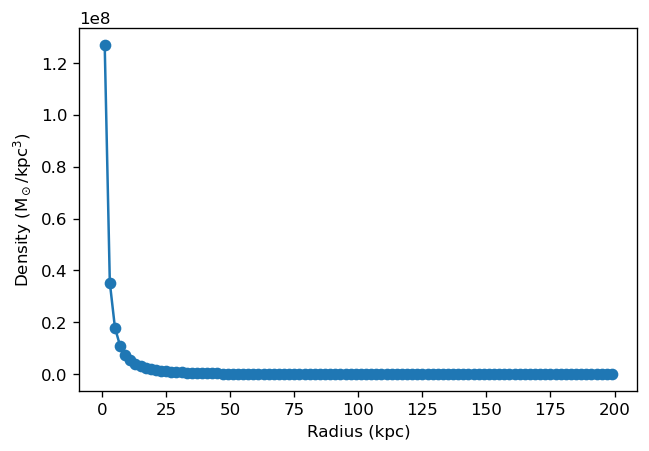

In [7]:
fig, ax = plt.subplots()
plt.plot(rmid, rho, '-o')
ax.set_xlabel('Radius (kpc)')
ax.set_ylabel(r'Density (M$_\odot$/kpc$^3$)')

Hmm, this plot is not so illustrative.  Because the NFW profile is a set of power laws, it is best viewed with log-log axes:

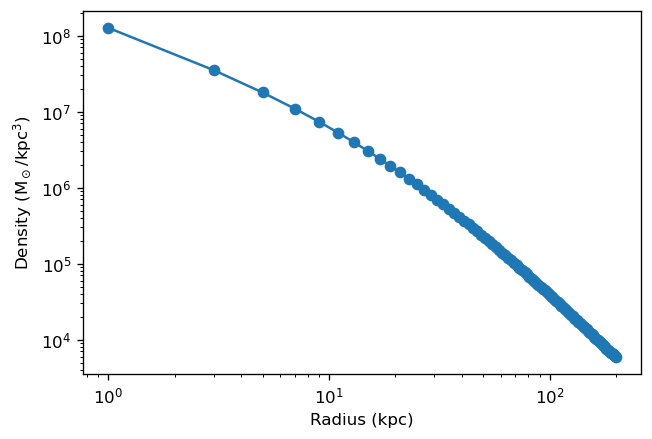

In [8]:
fig, ax = plt.subplots()
plt.plot(rmid, rho, '-o')
ax.set_xlabel('Radius (kpc)')
ax.set_ylabel(r'Density (M$_\odot$/kpc$^3$)')
ax.set_xscale('log')
ax.set_yscale('log')

While the blue line is drawing a straight line between each of the points, keep in mind that our approximation really represents the domain like this:

In [ ]:
fig, ax = plt.subplots()
plt.plot(rmid, rho, '-o')
plt.step(rmid, rho, '--', where='mid', color='red')
ax.set_xlabel('Radius (kpc)')
ax.set_ylabel(r'Density (M$_\odot$/kpc$^3$)')
ax.set_xscale('log')
ax.set_yscale('log')

## In-class exercise

Now that we have a measurement of the density at a set of radii spanning our domain, we can calculate an estimate of the total mass contained in the halo (without having to integrate the function analytically!).  What are the steps for calculating that mass numerically?

Hint: Recall that mass = density * volume.  What is the *volume* of space corresponding to each radial value for which we have calculated the density, given that the profile is spherically symmetric?

In [10]:
# characterize the area: rho * pi (r1^2 - r2^2)
# alternate way: rho * 2*pi*r_mid * dr    
# in the 3d case: 4*pi*Rmid^2*dr
shellvol = 4*pi*rmid**2 *dr
Mtot = np.sum(rho*shellvol)
np.log10(Mtot)

12.020357240823737

## Non-linear grids

Linearly-spaced grids are the simplest choice, but they are by no means the only option.  You can choose to sample the function in whatever way makes most sense given the functional form, you will just have to do some additional bookkeeping.  For example, you may want to concentrate your *resolution* (sampling density) in regions where the function is rapidly changing.

For power laws like the NFW profile, it often makes the most sense to use *logarithmically*-spaced bins.  Let's try making an array of radii equally spaced in log space from 0.1 to 100 kpc:

In [11]:
r_log_edges = np.logspace(-1,2,51)
r_log_edges

array([  0.1       ,   0.11481536,   0.13182567,   0.15135612,
         0.17378008,   0.19952623,   0.22908677,   0.2630268 ,
         0.30199517,   0.34673685,   0.39810717,   0.45708819,
         0.52480746,   0.60255959,   0.69183097,   0.79432823,
         0.91201084,   1.04712855,   1.20226443,   1.38038426,
         1.58489319,   1.81970086,   2.08929613,   2.39883292,
         2.7542287 ,   3.16227766,   3.63078055,   4.16869383,
         4.78630092,   5.49540874,   6.30957344,   7.2443596 ,
         8.31763771,   9.54992586,  10.96478196,  12.58925412,
        14.45439771,  16.59586907,  19.05460718,  21.87761624,
        25.11886432,  28.84031503,  33.11311215,  38.01893963,
        43.65158322,  50.11872336,  57.54399373,  66.0693448 ,
        75.8577575 ,  87.096359  , 100.        ])

We should find the "midpoints" of the bins in log space as well:

In [12]:
r_log_mids = 10.**((np.log10(r_log_edges[:-1]) + np.log10(r_log_edges[1:]))/2)
r_log_mids

array([ 0.10715193,  0.12302688,  0.14125375,  0.16218101,  0.18620871,
        0.21379621,  0.24547089,  0.28183829,  0.32359366,  0.37153523,
        0.42657952,  0.48977882,  0.56234133,  0.64565423,  0.74131024,
        0.85113804,  0.97723722,  1.12201845,  1.28824955,  1.47910839,
        1.69824365,  1.9498446 ,  2.23872114,  2.57039578,  2.95120923,
        3.38844156,  3.89045145,  4.46683592,  5.12861384,  5.88843655,
        6.76082975,  7.76247117,  8.91250938, 10.23292992, 11.74897555,
       13.48962883, 15.48816619, 17.7827941 , 20.41737945, 23.44228815,
       26.91534804, 30.90295433, 35.48133892, 40.73802778, 46.77351413,
       53.70317964, 61.65950019, 70.79457844, 81.28305162, 93.32543008])

Because one edge of our domain is $r=0$ and logarithms don't like zeros, we have to treat the smallest radial bin a little differently.  We'll manually set the left edge to 0 and the midpoint halfway to the right edge.

In [13]:
r_log_edges[0] = 0
r_log_mids[0] = r_log_edges[1]/2.

Now, each cell will have a different size, which means we need to keep track of $dr$ for every cell separately by subtracting all the left edges from all the right edges,

In [14]:
dr_log = r_log_edges[1:] - r_log_edges[:-1]
dr_log

array([ 0.11481536,  0.01701031,  0.01953045,  0.02242396,  0.02574615,
        0.02956053,  0.03394003,  0.03896837,  0.04474168,  0.05137032,
        0.05898102,  0.06771927,  0.07775213,  0.08927138,  0.10249726,
        0.1176826 ,  0.13511771,  0.15513589,  0.17811983,  0.20450893,
        0.23480767,  0.26959527,  0.30953679,  0.35539578,  0.40804896,
        0.46850289,  0.53791329,  0.61760709,  0.70910782,  0.81416471,
        0.93478616,  1.07327811,  1.23228815,  1.4148561 ,  1.62447216,
        1.86514359,  2.14147137,  2.45873811,  2.82300906,  3.24124808,
        3.72145072,  4.27279712,  4.90582748,  5.63264359,  6.46714014,
        7.42527037,  8.52535107,  9.7884127 , 11.23860149, 12.903641  ])

From here, we can calculate rho at each point (and calculate the total mass) in just the same way:

In [15]:
rho = rho0/(r_log_mids/rs)/(1+r_log_mids/rs)**2

When we show the grid points in a log-log plot, it is clear that we have successfully spaced them equally in log space as intended:

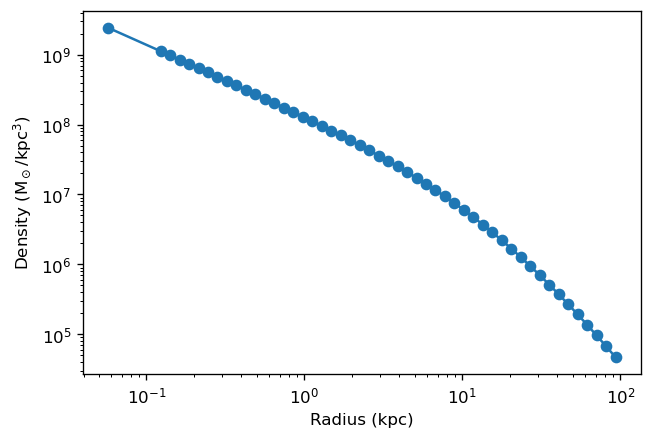

In [16]:
fig, ax = plt.subplots()
plt.plot(r_log_mids, rho, '-o')
ax.set_xlabel('Radius (kpc)')
ax.set_ylabel(r'Density (M$_\odot$/kpc$^3$)')
ax.set_xscale('log')
ax.set_yscale('log')

Why bother with the extra bookkeeping to make the grid logarithmic?  It will make our calculations more accurate without having to increase the number of grid cells.  Because the value of $\rho$ is so much larger and is changing so much faster in the inner part of the halo, increasing the density of the grid in this region disproportionately impacts the accuracy of our calculation of total mass. 

In [17]:
# Calculate mass estimate as a function of number of cells with linear and logarithmic grids

ncells = np.arange(5,100)
Mtot_lin = []
Mtot_log = []

for n in ncells:
    # Linear grid
    redges = np.linspace(0,200,n+1)
    dr = redges[1] - redges[0]
    rmid = redges[:-1] + dr/2
    rho = rho0/(rmid/rs)/(1+rmid/rs)**2
    shellvol = 4*pi*rmid**2 * dr
    Mtot_lin.append(np.sum(rho*shellvol))
    
    # Logarithmic grid
    r_log_edges = np.logspace(1-n/50,np. log10(200),n+1)
    r_log_mids = 10.**((np.log10(r_log_edges[:-1]) + np.log10(r_log_edges[1:]))/2)
    r_log_edges[0] = 0
    r_log_mids[0] = r_log_edges[1]/2.
    dr_log = r_log_edges[1:] - r_log_edges[:-1]
    rho = rho0/(r_log_mids/rs)/(1+r_log_mids/rs)**2
    shellvol = 4*pi*r_log_mids**2 * dr_log
    Mtot_log.append(np.sum(rho*shellvol))

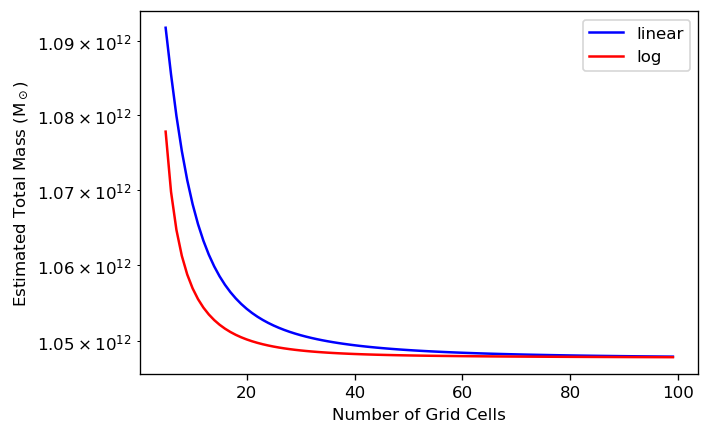

In [18]:
fig, ax = plt.subplots()
plt.plot(ncells, Mtot_lin, '-', color='blue')
plt.plot(ncells, Mtot_log, '-', color='red')
ax.set_xlabel('Number of Grid Cells')
ax.set_ylabel(r'Estimated Total Mass (M$_\odot$)')
ax.set_yscale('log')
ax.legend(['linear', 'log'])

Note: you should **not** take away from this that logarithmic gridding is always better!  It *can* be better in certain circumstances, but would often be a terrible choice.  The real lesson is this: it is often worth your time to **adapt your numerical choices to your specific problem.**